In [1]:
from packages.data_classes.data2D import Data2D
from packages.data_classes.mesh import Mesh
from packages.plot_classes.tangram import Tangram

In [2]:
import numpy

In [3]:
SD0203_mesh = Mesh('./Data/Geometry/SD/S20190203@25-6-66_24-6.v001.sno')
FS0308_mesh = Mesh('./Data/Geometry/FS/S20190308@25-10-50_25-6.v001.sno')
XD0130_mesh = Mesh('./Data/Geometry/XD/X20190130@31-12-68_26-6.v001.sno')

be careful! data2D reads in IyIx order but quadmesh has to drawn in IxIy order to take care of the cuts!

In [4]:
# cell z-coordinate (in meters)

SD_cz = Data2D(SD0203_mesh, './Data/SDP6/2D_data/geometry/cz_2D')

FS_cz = Data2D(FS0308_mesh, './Data/FSP6/2D_data/geometry/cz_2D')

XD_cz = Data2D(XD0130_mesh, './Data/XDP6/2D_data/geometry/cz_2D')

In [5]:
# electron temperature
SD_te = Data2D(SD0203_mesh, './Data/SDP6/2D_data/temperature/T_electron/te_2D')

FS_te = Data2D(FS0308_mesh, './Data/FSP6/2D_data/temperature/T_electron/te_2D')

XD_te = Data2D(XD0130_mesh, './Data/XDP6/2D_data/temperature/T_electron/te_2D')

In [6]:
# electron density
SD_ne = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_electron/ne_2D')

FS_ne = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_electron/ne_2D')

XD_ne = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_electron/ne_2D')

calculate dz from target

In [5]:
print(SD_cz.IyIx.min())
print(FS_cz.IyIx.min())
print(XD_cz.IyIx.min())

-1.36300069095
-1.36300069095
-1.36300075055


In [7]:
# dz from target

SD_dz = SD_cz.IyIx - SD_cz.IyIx.min()

FS_dz = FS_cz.IyIx - FS_cz.IyIx.min()

XD_dz = XD_cz.IyIx - XD_cz.IyIx.min()

calculate tau due to perpendicular diffusion

In [8]:
SD_tauDiffusion = SD_dz * SD_dz / 0.15

FS_tauDiffusion = FS_dz * FS_dz / 0.15

XD_tauDiffusion = XD_dz * XD_dz / 0.15

calculate n\*tau

In [9]:
SD_neTauDiffusion = SD_tauDiffusion * SD_ne.IyIx

FS_neTauDiffusion = FS_tauDiffusion * FS_ne.IyIx

XD_neTauDiffusion = XD_tauDiffusion * XD_ne.IyIx

take out the outer divertor part and transpose

In [10]:
# ntau

SD_neTauDiffusion_outerdiv = numpy.transpose(SD_neTauDiffusion[:, SD0203_mesh.ixcut[1]:])

FS_neTauDiffusion_outerdiv = numpy.transpose(FS_neTauDiffusion[:, FS0308_mesh.ixcut[1]:])

XD_neTauDiffusion_outerdiv = numpy.transpose(XD_neTauDiffusion[:, XD0130_mesh.ixcut[1]:])

In [8]:

#SD_tauDiffusion_outerdiv = numpy.transpose(SD_tauDiffusion[:, SD0203_mesh.ixcut[1]:])

#FS_tauDiffusion_outerdiv = numpy.transpose(FS_tauDiffusion[:, FS0308_mesh.ixcut[1]:])

#XD_tauDiffusion_outerdiv = numpy.transpose(XD_tauDiffusion[:, XD0130_mesh.ixcut[1]:])

In [11]:
# te outer divertor
SD_te_outerdiv = numpy.transpose(SD_te.IyIx[:, SD0203_mesh.ixcut[1]:])

FS_te_outerdiv = numpy.transpose(FS_te.IyIx[:, FS0308_mesh.ixcut[1]:])

XD_te_outerdiv = numpy.transpose(XD_te.IyIx[:, XD0130_mesh.ixcut[1]:])

# start attempting plots

## prepare figure and its axes

In [12]:
import matplotlib.pyplot as plt

### do scatter plots

the data along flux tubes within lambda_q radially out from the separatrix

In [13]:
%%capture

fig_1, ax_1 = plt.subplots()

In [73]:
%%capture

ax_1.scatter(SD_te_outerdiv[:, SD0203_mesh.iycut : 22], SD_neTauDiffusion_outerdiv[:, SD0203_mesh.iycut : 22], c = "w", marker = "s", edgecolors = "r")
ax_1.scatter(FS_te_outerdiv[:, FS0308_mesh.iycut : 20], FS_neTauDiffusion_outerdiv[:, FS0308_mesh.iycut : 20], c = "w", marker = "^", edgecolors = "m")
ax_1.scatter(XD_te_outerdiv[:, XD0130_mesh.iycut : 22], XD_neTauDiffusion_outerdiv[:, XD0130_mesh.iycut : 22], c = "w", marker = ".", edgecolors = "b")

add legend using scatter plot trick

In [74]:
%%capture

ax_1_legend_marker_SD = ax_1.scatter([40], [3e15], c = "w", marker = "s", edgecolors = "r")
ax_1_legend_marker_FS = ax_1.scatter([40], [1e15], c = "w", marker = "^", edgecolors = "m")
ax_1_legend_marker_XD = ax_1.scatter([40], [3e14], c = "w", marker = ".", edgecolors = "b")

add legend text

In [75]:
ax_1_legend_text_SD = ax_1.text(42, 2.5e15, "SD10")
ax_1_legend_text_FS = ax_1.text(42, 8e14, "SD20")
ax_1_legend_text_XD = ax_1.text(42, 2.5e14, "XD")

In [76]:
ax_1_legend_text_SD.set_position((42, 2.4e15))
ax_1_legend_text_FS.set_position((42, 7.7e14))
ax_1_legend_text_XD.set_position((42, 2.3e14))

set the axes label

In [77]:
%%capture
ax_1.set_xlabel("Te (eV)")
ax_1.set_ylabel(r"$n_{e}\tau$ for carbon perpendicular diffusion ($m^{-3}$s)")

add explanation text

In [78]:
ax_1_explain_text = ax_1.text(15, 2e13, "data along flux tubes within $\lambda_{q}$ at OMP")
ax_1_explain_text.set_fontsize(12)

In [54]:
ax_1_explain_text.set_position((16, 2e13))

In [79]:
ax_1.set_yscale("log")

In [80]:
ax_1.set_xbound(0, 50)
ax_1.set_ybound(1e13, 5e19)

In [81]:
ax_1.set_position([0.1, 0.1, 0.9, 0.9])

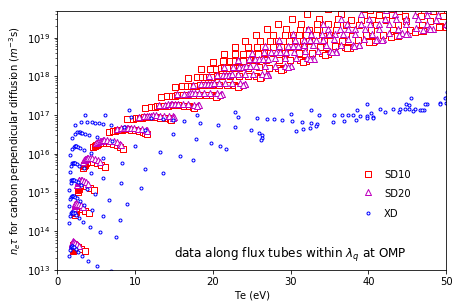

In [82]:
fig_1

In [83]:
fig_1.savefig('neTauCarbonDiffusionP6-lq_Scatter.svg', format='svg', bbox_inches='tight')

the data along flux tubes within 1 ~ 2mm radially out from the separatrix

In [57]:
%%capture

fig_2, ax_2 = plt.subplots()

In [60]:
%%capture

ax_2.scatter(SD_te_outerdiv[:, 19 : 22], SD_IonSourceDensityC_outerdiv[:, 19 : 22], c = "w", marker = "s", edgecolors = "r")
ax_2.scatter(FS_te_outerdiv[:, 17 : 20], FS_IonSourceDensityC_outerdiv[:, 17 : 20], c = "w", marker = "^", edgecolors = "m")
ax_2.scatter(XD_te_outerdiv[:, 21 : 24], XD_IonSourceDensityC_outerdiv[:, 21 : 24], c = "w", marker = ".", edgecolors = "b")

add legend using scatter plot trick

In [68]:
%%capture

ax_2_legend_marker_SD = ax_2.scatter([35.5], [1e24], c = "w", marker = "s", edgecolors = "r")
ax_2_legend_marker_FS = ax_2.scatter([35.5], [1e23], c = "w", marker = "^", edgecolors = "m")
ax_2_legend_marker_XD = ax_2.scatter([35.5], [1e22], c = "w", marker = ".", edgecolors = "b")

add legend text

In [69]:
ax_2_legend_text_SD = ax_2.text(36.1, 6e23, "SD10")
ax_2_legend_text_FS = ax_2.text(36.1, 6e22, "SD20")
ax_2_legend_text_XD = ax_2.text(36.1, 6e21, "XD")

In [47]:
ax_2_legend_text_SD.set_position((36.1, 6e23))
ax_2_legend_text_FS.set_position((36.1, 6e22))
ax_2_legend_text_XD.set_position((36.1, 6e21))

set the axes label

In [70]:
%%capture
ax_2.set_xlabel("Te (eV)")
ax_2.set_ylabel("carbon ionization source density ($m^{-3}$$s^{-1}$)")

add explanation text

In [71]:
ax_2_explain_text = ax_2.text(16, 8e15, "1mm < R - $R_{sep}$ < 2mm at OMP")
ax_2_explain_text.set_fontsize(12)

In [54]:
ax_2_explain_text.set_position((12.5, 6e23))

In [61]:
ax_2.set_yscale("log")

In [72]:
ax_2.set_xbound(5, 40)
ax_2.set_ybound(1e15, 1e25)

In [74]:
ax_2.set_position([0.1, 0.1, 0.9, 0.9])

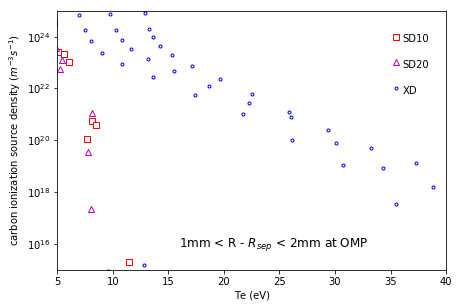

In [75]:
fig_2

In [76]:
fig_2.savefig('CIonizationSourceDensityP6-2mm_Scatter.svg', format='svg', bbox_inches='tight')